In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from tabulate import tabulate
from networkx.algorithms import bipartite
import random
from scipy.stats import norm
from IPython.display import Image
from itertools import combinations
import re
from itertools import product
import functions_network_medicine_schizo

### Data

In [2]:
#nodes
pro = pd.read_csv('../data/nodes/pro.tsv', sep="\t")
gen = pd.read_csv('../data/nodes/gen.tsv', sep="\t")
dru = pd.read_csv('../data/nodes/dru.tsv', sep="\t")
dis = pd.read_csv('../data/nodes/dis.tsv', sep="\t")

In [3]:
#links
pro_pro = pd.read_csv('../data/links/pro_pro.tsv', sep="\t")
dis_gen = pd.read_csv('../data/links/dis_gen.tsv', sep="\t")
dse_sym = pd.read_csv('../data/dse_sym_limpio.tsv', sep="\t")
dis_dru_the = pd.read_csv('../data/links/dis_dru_the.tsv', sep="\t")
gen_pro = pd.read_csv('../data/links/gen_pro.tsv', sep="\t")
dru_pro = pd.read_csv('../data/links/dru_pro.tsv', sep="\t")

In [4]:
#file with SPLs between all PPI nodes
spl = pd.read_csv('../files/SPL PPI.csv', index_col='Source')

### Interactome

In [5]:
G_ppi = nx.from_pandas_edgelist(pro_pro,'prA','prB')

### Disease module

In [6]:
# seed genes
genes = functions_network_medicine_schizo.genes_dis("C0036341", dis_gen)
# disease proteins
prots = functions_network_medicine_schizo.pro_gen_dict(genes, gen_pro)
# disease proteins in interactome
pro_ppi = functions_network_medicine_schizo.gen_pro_PPI(prots, pro_pro)
# disease subnetwork
SG_schizo = G_ppi.subgraph(pro_ppi)
# disease module
lcc_schizo= functions_network_medicine_schizo.lcc(SG_schizo)
# statistical analysis of disease module's size
lcc_ndp_schizo = functions_network_medicine_schizo.lcc_simulation(SG_schizo, lcc_schizo, G_ppi, dp=False) #non-degree preserving
lcc_dp_schizo = functions_network_medicine_schizo.lcc_simulation(SG_schizo, lcc_schizo, G_ppi, dp=True) #degree preserving

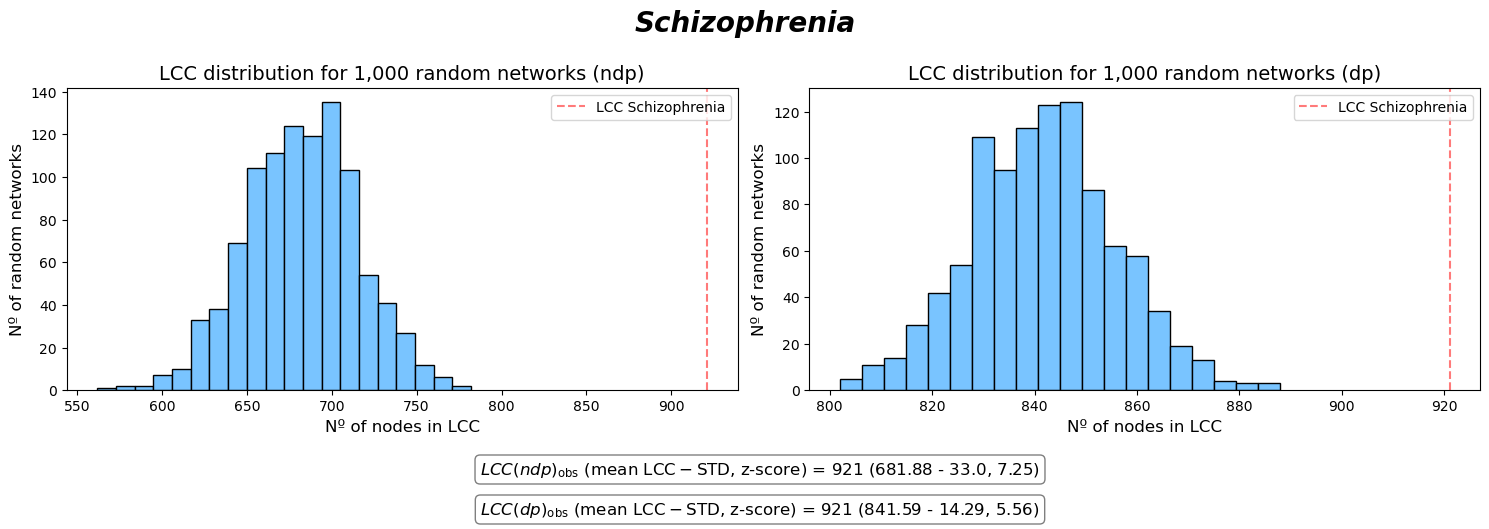

<Figure size 640x480 with 0 Axes>

In [7]:
functions_network_medicine_schizo.rep("Schizophrenia", SG_schizo, G_ppi, lcc_ndp_schizo[3], lcc_dp_schizo[3], lcc_schizo, lcc_ndp_schizo[0], lcc_ndp_schizo[1], lcc_ndp_schizo[2], lcc_dp_schizo[0], lcc_dp_schizo[1], lcc_dp_schizo[2])
plt.savefig('../figures/LCC analysis schizophrenia.png', format='png')

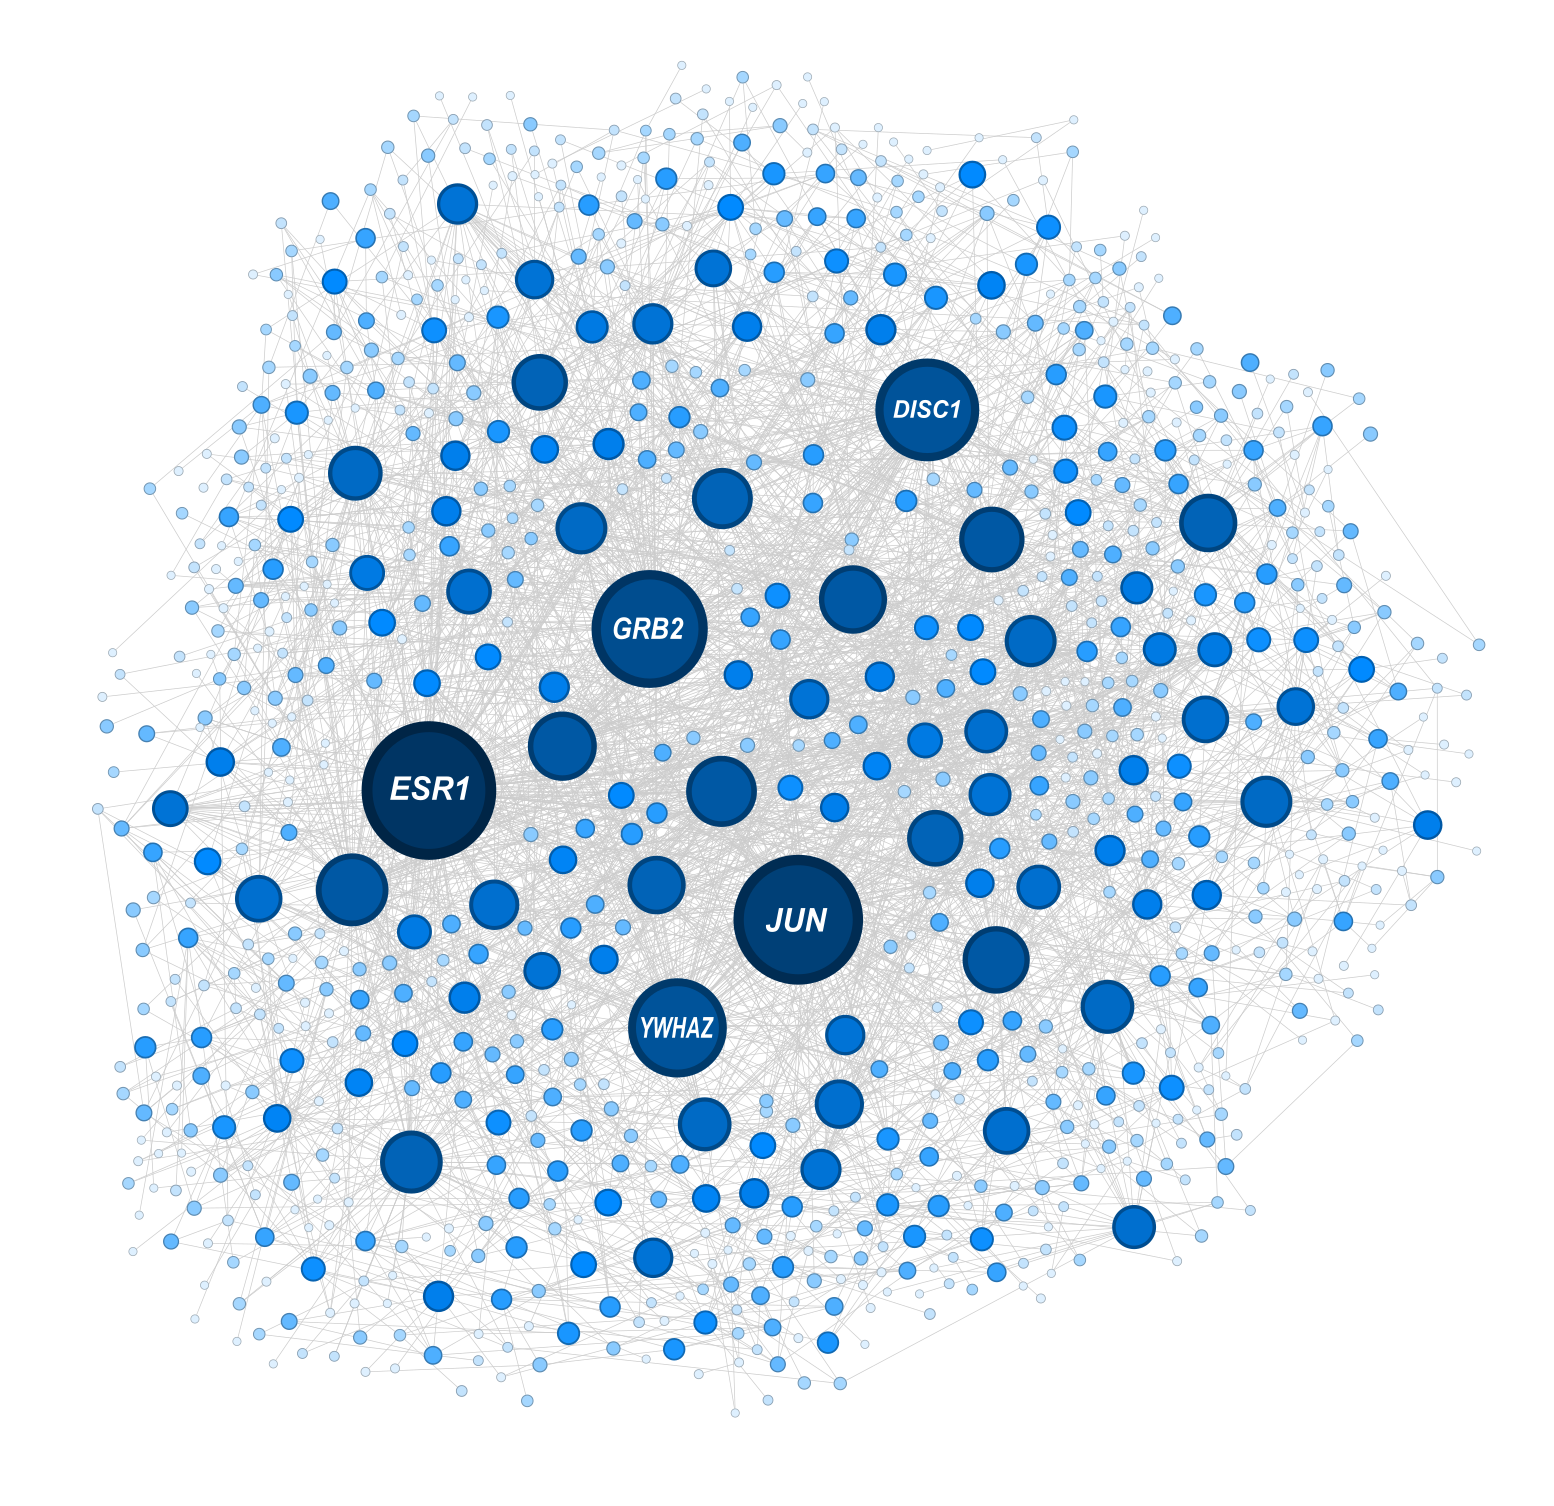

In [2]:
#Image done with Gephi and Inkspace
Image(filename="../figures/schizophrenia module.png")

### Closest distance and proximity disease-drug

In [8]:
proximity = pd.read_csv("../results/Proximity_results.csv", sep = ",")

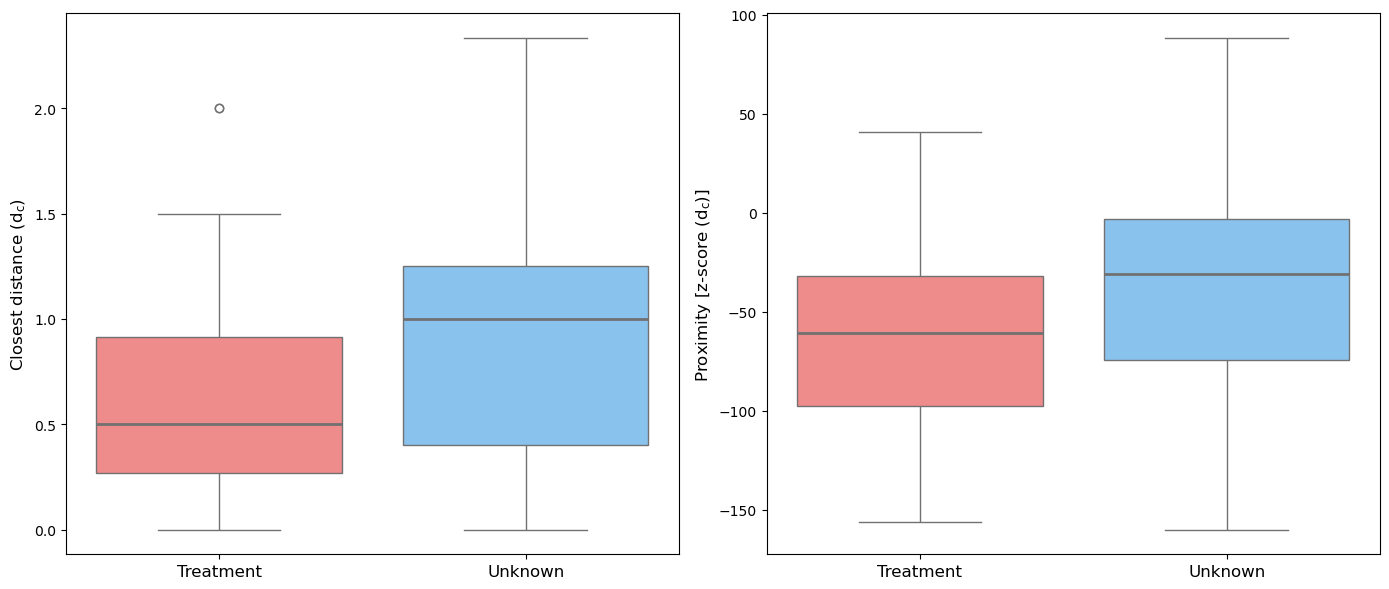

<Figure size 640x480 with 0 Axes>

In [9]:
functions_network_medicine_schizo.rep_prox(proximity, "C0036341")
plt.savefig('../figures/proximity schizophrenia.svg', format='svg', bbox_inches='tight' )